In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_awe = pd.read_csv('QIPQ1_avg_weekly_earnings.csv')# awe average weekly earnings

In [3]:
df_awe.tail()

,Industry Sector,Type of Employee,Quarter,Statistic Label,UNIT,VALUE
4315,Mining and Quarrying (NACE 10-14),Industrial Employees,2006Q2,Average Weekly Earnings (Euro),Euro,NaN
4316,Mining and Quarrying (NACE 10-14),Industrial Employees,2006Q3,Average Weekly Earnings (Euro),Euro,NaN
4317,Mining and Quarrying (NACE 10-14),Industrial Employees,2006Q4,Average Weekly Earnings (Euro),Euro,NaN
4318,Mining and Quarrying (NACE 10-14),Industrial Employees,2007Q1,Average Weekly Earnings (Euro),Euro,NaN
4319,Mining and Quarrying (NACE 10-14),Industrial Employees,2007Q2,Average Weekly Earnings (Euro),Euro,NaN


In [4]:
print("CHECKING the shape: ",df_awe.shape)#Checking shape
print("\n CHECKING NULL values :\n",df_awe.dtypes)#checking data types
#print("\n Check info:\n",df_fnie.info)# checking info
print("\n COUNT is :\n",df_awe.count() )#count rows
print("\n CHECKING NULL values :\n",df_awe.isnull().sum())#checking null values

CHECKING the shape:  (4320, 6)

 CHECKING NULL values :
 Industry Sector      object
Type of Employee     object
Quarter              object
Statistic Label      object
UNIT                 object
VALUE               float64
dtype: object

 COUNT is :
 Industry Sector     4320
Type of Employee    4320
Quarter             4320
Statistic Label     4320
UNIT                4320
VALUE               3420
dtype: int64

 CHECKING NULL values :
 Industry Sector       0
Type of Employee      0
Quarter               0
Statistic Label       0
UNIT                  0
VALUE               900
dtype: int64


### Things to solve:
### - Column VALUE does not have all the values like the rest.
### - Also, there are 900 null values
### - some columns have string values
### - "Statistic Label" and UNIT columns are irrelevant

In [5]:
df_awe.drop(['UNIT','Statistic Label'], axis=1,inplace=True)# dropping column because i will not use it.

In [6]:
df_awe.rename(columns = {'Industry Sector':'industry_sector',
                          'VALUE':'value',
                          'Type of Employee':'type_of_employee',
                          'Quarter':'quarter'}, 
                            inplace = True) #Changing column names

In [7]:
df_awe.head()

,industry_sector,type_of_employee,quarter,value
0,All Industries (NACE 1-4),All Employees,1995Q3,NaN
1,All Industries (NACE 1-4),All Employees,1995Q4,402.96
2,All Industries (NACE 1-4),All Employees,1996Q1,402.27
3,All Industries (NACE 1-4),All Employees,1996Q2,410.23
4,All Industries (NACE 1-4),All Employees,1996Q3,407.09


In [8]:
df_awe["value"].fillna(0.0, inplace = True)

In [9]:
print("CHECKING NULL in column value :",df_awe['value'].isnull().sum())#checking null values

CHECKING NULL in column value : 0


In [10]:
from sklearn.preprocessing import LabelEncoder

cols = ['industry_sector', 'type_of_employee', 'quarter']# cloumns to encode

df_awe[cols] = df_awe[cols].apply(LabelEncoder().fit_transform)# apply encoder before using model

In [99]:
df_awe.head(20)#to see the first 20 rows

,industry_sector,type_of_employee,quarter,value
0,0,0,0,0.00
1,0,0,1,402.96
2,0,0,2,402.27
3,0,0,3,410.23
4,0,0,4,407.09
5,0,0,5,422.72
6,0,0,6,420.00
7,0,0,7,424.55
8,0,0,8,426.42
9,0,0,9,437.51


### Before Applying machine learning, I will show some statistics charasteristics:

In [100]:
from scipy import stats
print('variance of value',np.var(df_awe['value']))

mode = stats.mode(df_awe['value'])
print('mode is: ',mode)

variance of value 101688.83595476298
mode is:  ModeResult(mode=0.0, count=900)


In [12]:
df_awe.describe()# with the function describe I can get descriptive statistics

,industry_sector,type_of_employee,quarter,value
count,4320.000000,4320.000000,4320.000000,4320.000000
mean,8.500000,2.000000,23.500000,518.355083
std,5.188728,1.414377,13.855003,318.923785
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,11.750000,389.862500
50%,8.500000,2.000000,23.500000,571.715000
75%,13.000000,3.000000,35.250000,723.757500
max,17.000000,4.000000,47.000000,1589.950000


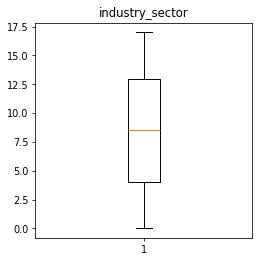

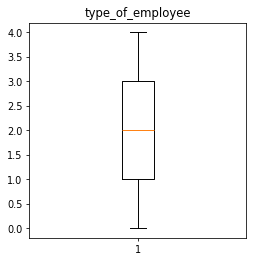

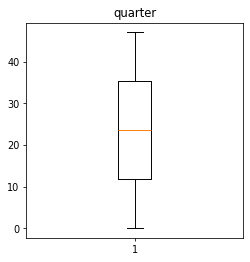

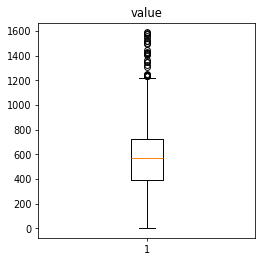

In [13]:
from matplotlib.pyplot import figure

#use of for loop to iterate df_awe.columns.values and show boxplots at the same time :
for i in df_awe.columns.values:
    figure(figsize=(4, 4), dpi=70)
    plt.title(i)
    plt.boxplot(df_awe[i])
    plt.show()



In [14]:
#function to draw histogram and not reapeat code: 
def draw_histogram(column,color_bar,color_border):
    sns.distplot(column, hist=True, kde=True, 
             bins=int(180/5), color = color_bar, 
             hist_kws={'edgecolor':color_border},
             kde_kws={'linewidth': 4});

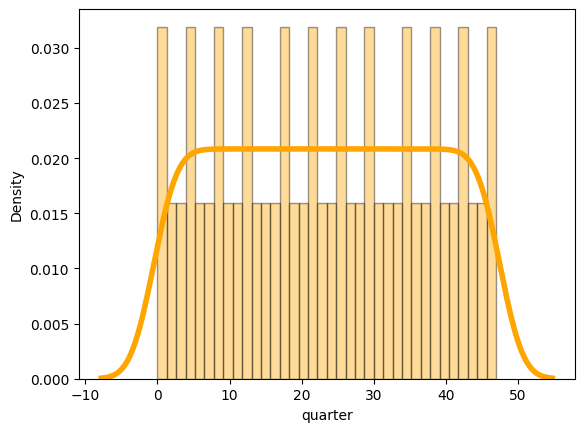

In [15]:
draw_histogram(df_awe['quarter'],'orange','black')

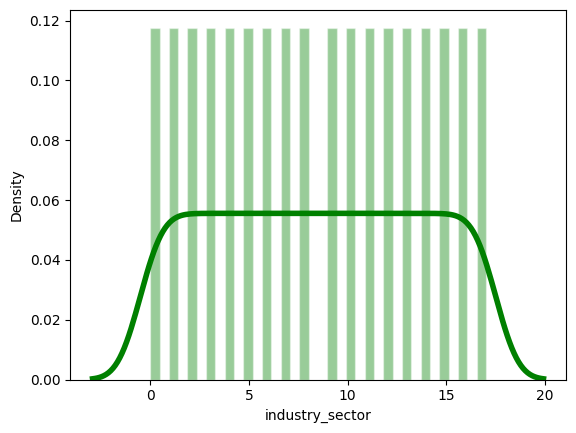

In [16]:
draw_histogram(df_awe['industry_sector'],'green','white')

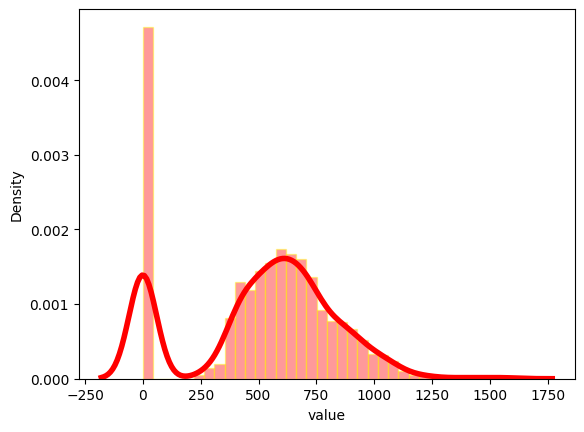

In [17]:
draw_histogram(df_awe['value'],'red','yellow')

{'bodies': [<matplotlib.collections.PolyCollection at 0x160b78b90>],
 'cmeans': <matplotlib.collections.LineCollection at 0x160cc8f10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x160e20f50>,
 'cmins': <matplotlib.collections.LineCollection at 0x160e22550>,
 'cbars': <matplotlib.collections.LineCollection at 0x160d734d0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x160e30d10>}

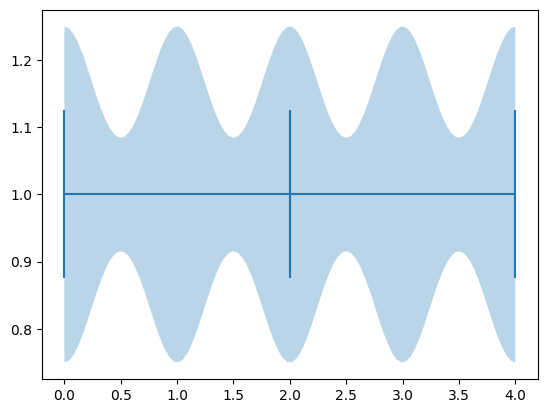

In [18]:
plt.violinplot(df_awe['type_of_employee'],#show violin plot
                  showmeans=True,
                  showmedians=True,
                  vert=False)

### Using poisson on 'quarter' column

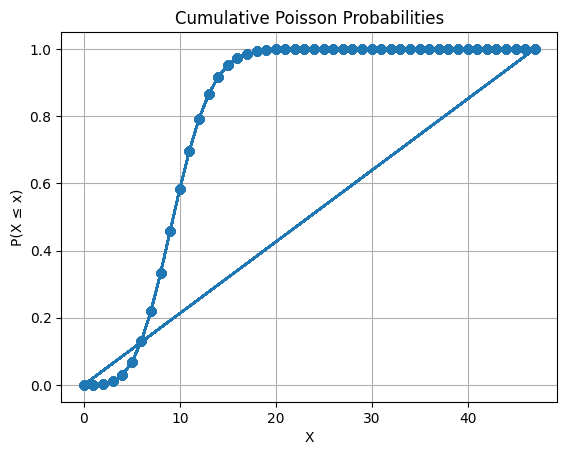

In [20]:
from scipy.stats import poisson

lambda_parameter = 10

poisson_cdf = [poisson.cdf(x, lambda_parameter) for x in df_awe['quarter']]

def draw_graph_probabilities(column):#function to show graph and not to repeat code
    plt.plot(df_awe[column], poisson_cdf, marker='o', linestyle='-')
    plt.xlabel('X')
    plt.ylabel('P(X ≤ x)')
    plt.title('Cumulative Poisson Probabilities')
    plt.grid(True)

    plt.show()

draw_graph_probabilities('quarter')

### Using poison on 'industry_sector' column

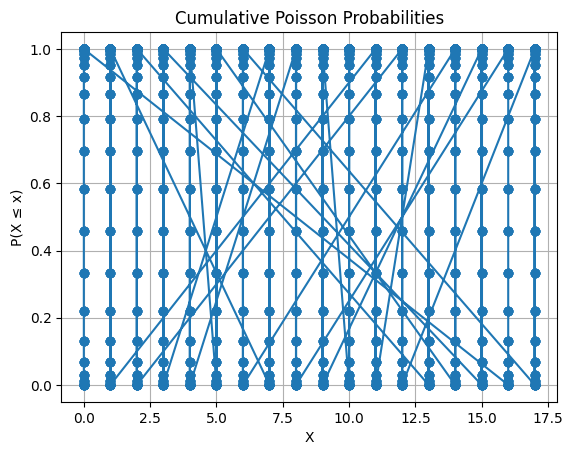

In [21]:
poisson_pmf = [poisson.pmf(x, lambda_parameter) for x in df_awe['industry_sector']]

draw_graph_probabilities('industry_sector')#execute function to show cumulative

### Using normal distribution

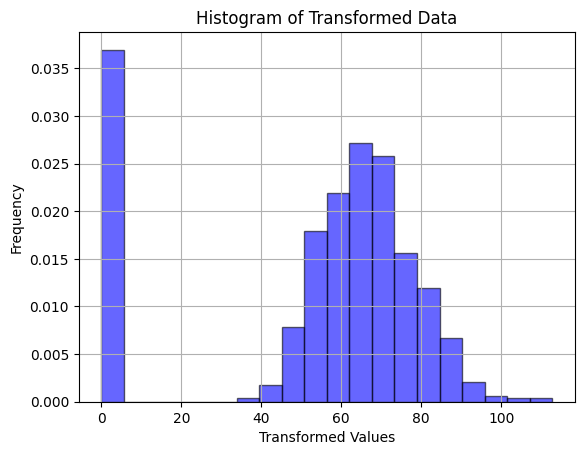

In [106]:
data_value = df_awe['value']

transformed_data_normal, _ = stats.yeojohnson(data_value)# apply the Yeo-Johnson transformation

plt.hist(transformed_data_normal, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')
plt.title('Histogram of Transformed Data')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


## Split data to train and test

In [50]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare a variable named as 'X' and 'y'
X = df_awe.iloc[:, :-1].values               # All features (independent varaibles) except MEDV 
y = df_awe['value'].values                    # Target variable

# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4320, 3), (4320,), (3024, 3), (1296, 3), (3024,), (1296,))

## Apply Random Forest Regression

Mean Squared Error is: 6277.983224919023
r2_score is: 0.9389650235902494


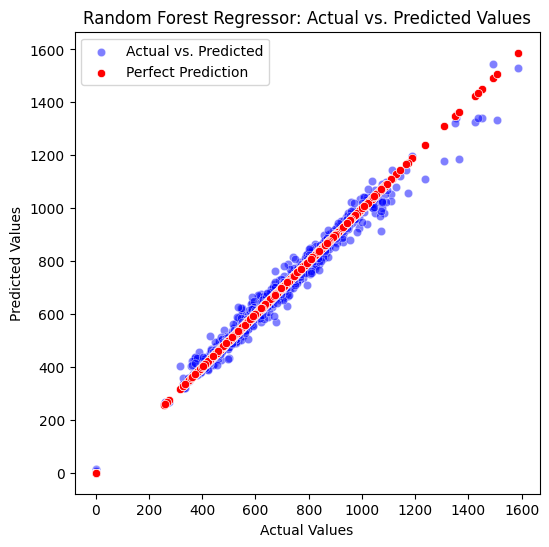

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

class RandomForestRegression:
    def __init__(self, n_estimators=100,
                 max_depth=None,
                 random_state=None,
                 max_features=None,
                 min_samples_split= 2,
                 min_samples_leaf= 1,
                 bootstrap= True):
        self.model = RandomForestRegressor(n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           random_state=random_state,
                                           max_features=max_features,
                                           min_samples_split= min_samples_split,
                                           min_samples_leaf= min_samples_leaf,
                                           bootstrap= bootstrap)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = metrics.mean_squared_error(y, y_pred)
        r2_score = metrics.r2_score(y, y_pred)
        
        print(f'Mean Squared Error is: {mse}')
        print(f'r2_score is: {r2_score}')

    def plot_predictions(self, X, y):
        y_pred = model.predict(X)

        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=y, y=y_pred, color='blue', alpha=0.5, label='Actual vs. Predicted')
        sns.scatterplot(x=y_test, y=y_test, color='red', label='Perfect Prediction')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Random Forest Regressor: Actual vs. Predicted Values')
        plt.show()


rf_model = RandomForestRegression(n_estimators = 500,
                           max_features = 'sqrt',
                           max_depth = 8,
                           random_state = 10,
                           min_samples_split= 4,
                           min_samples_leaf= 2,
                           bootstrap= False)
rf_model.fit(X_train, y_train)

rf_model.evaluate(X_test, y_test)# Evaluate the model

rf_model.plot_predictions(X_test, y_test)#show plot


Mean Squared Error is: 3818.9225121024956
r2_score is: 0.9628721777223531


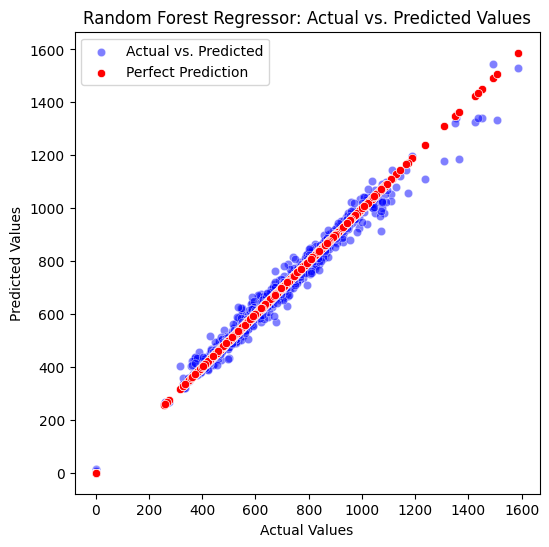

In [84]:
second_rf_model = RandomForestRegression(n_estimators=300, max_depth=7, random_state=10)

second_rf_model.fit(X_train, y_train)

second_rf_model.evaluate(X_test, y_test)# Evaluate the model

second_rf_model.plot_predictions(X_test, y_test)#show plot

## Use of hyperparameters with Random

In [79]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators':[350,450,550],
               'max_features': [None, 'sqrt'],
               'max_depth': [4,6,8],
               'random_state':[6,8,10],
               'min_samples_split': [2, 4],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

rf_random_grid = RandomizedSearchCV(estimator = RandomForestRegressor(),
                                   param_distributions = param_grid,
                                   cv = 10,
                                   verbose=2,
                                   n_jobs = 4)

rf_random_grid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 6, 8],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [350, 450, 550],
                                        'random_state': [6, 8, 10]},
                   verbose=2)

In [80]:
print("best score is: ",rf_random_grid.best_score_)
print('best params are: ',rf_random_grid.best_params_)


best score is:  0.974412926170188
best params are:  {'random_state': 10, 'n_estimators': 350, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'bootstrap': True}
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=350, random_state=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=350, random_state=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=350, random_state=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=350, random_state=8; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=350, random_state=8; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_fe

### Installing XGBoost

In [28]:
pip install xgboost # install xgboost because is not iontalled

Note: you may need to restart the kernel to use updated packages.


## Apply XGBoost in Regression

In [85]:
from xgboost import XGBRegressor

xbgr = XGBRegressor(n_estimators = 200,
                    learning_rate=0.35,
                    max_depth = 3,
                    min_child_weight = 3,
                    subsample = 0.55,
                    colsample_bytree = 0.7,
                    reg_alpha=0.5,# L1 (Lasso) regularization
                    reg_lambda=1)# L2 (Ridge) regularization

xbgr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.35, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
y_predict_xgb = xbgr.predict(X_test)

In [89]:
print('r2_score in XGBRegressor = ', metrics.r2_score(y_test, y_predict_xgb))
print('mean squared error in XGBoost regressor is: ',metrics.mean_squared_error(y_test, y_predict_xgb))

r2_score in XGBRegressor =  0.9888792367318315
mean squared error in XGBoost regressor is:  1143.8681449986423


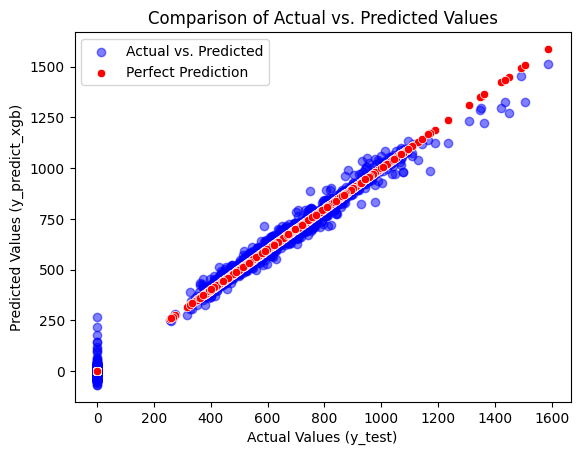

In [68]:
plt.scatter(y_test, y_predict_xgb, color='blue', alpha=0.5, label='Actual vs. Predicted')
sns.scatterplot(x=y_test, y=y_test, color='red', label='Perfect Prediction')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_predict_xgb)')
plt.title('Comparison of Actual vs. Predicted Values')

plt.legend()
plt.show()

## Use of hyperparameters with GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

model_in_gscv = XGBRegressor()

parameters_xgb = { 
      'learning_rate': [0.045,0.05,0.06], 
      'max_depth': [3,4,5],
      'min_child_weight': [2,3,4],
      'subsample': [0.5,0.55,0.6],
      'colsample_bytree': [0.7,0.8,0.85],
      'n_estimators': [200,300,500]}

xgb_grid = GridSearchCV(model_in_gscv,
                        parameters_xgb,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)#it takes 10 seconds to complete.


[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=550, random_state=8; total time=   0.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=550, random_state=8; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=450, random_state=8; total time=   0.4s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=450, random_state=8; total time=   0.4s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=450, random_state=8; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=550, random_state=8; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=450, random_state=6; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=450, random_state=6; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=450, random_state=6; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=550, random_state=8; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=550, random_state=8; total time=   0.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=450, random_state=8; total time=   0.4s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_spl

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.85],
                         'learning_rate': [0.045, 0.05, 0.06],
                         'max_depth': [3, 4, 5], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [200, 300, 500],
                         'subsample': [0.5, 0.55, 0.6]},
             verbose=True)

In [34]:
print("best score is: ",xgb_grid.best_score_)
print('best params are: ',xgb_grid.best_params_)

best score is:  0.9918613994996384
best params are:  {'colsample_bytree': 0.7, 'learning_rate': 0.06, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 500, 'subsample': 0.5}


In [96]:
from sklearn.model_selection import cross_val_score

rf_model_to_cross = RandomForestRegressor(n_estimators=300, max_depth=7, random_state=10)

rf_model_to_cross.fit(X_train, y_train)

rf_y_predict = rf_model_to_cross.predict(X_test)

rf_test_mse = mean_squared_error(y_test, rf_y_predict)

rf_cv_scores = cross_val_score(rf_model_to_cross, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores_mean = -np.mean(rf_cv_scores)

print("Random Forest Regressor MSE : ", rf_test_mse)
print(f"RFR Cross-Validation MSE: ", rf_cv_scores_mean)

xgb_cv_scores = cross_val_score(xbgr, X, y, cv=5, scoring='neg_mean_squared_error')
xgb_cv_scores_mean = -np.mean(xgb_cv_scores)

print("\nXGBoost Regressor MSE : ",xgb_test_mse)
print(f"XGB Cross-Validation MSE: {xgb_cv_scores_mean:.2f}")


Random Forest Regressor MSE :  3818.9225121024956
RFR Cross-Validation MSE:  10155.434334775426

XGBoost Regressor MSE :  398.44664610716535
XGB Cross-Validation MSE: 18111.13


## Use of cross-validation to compare models

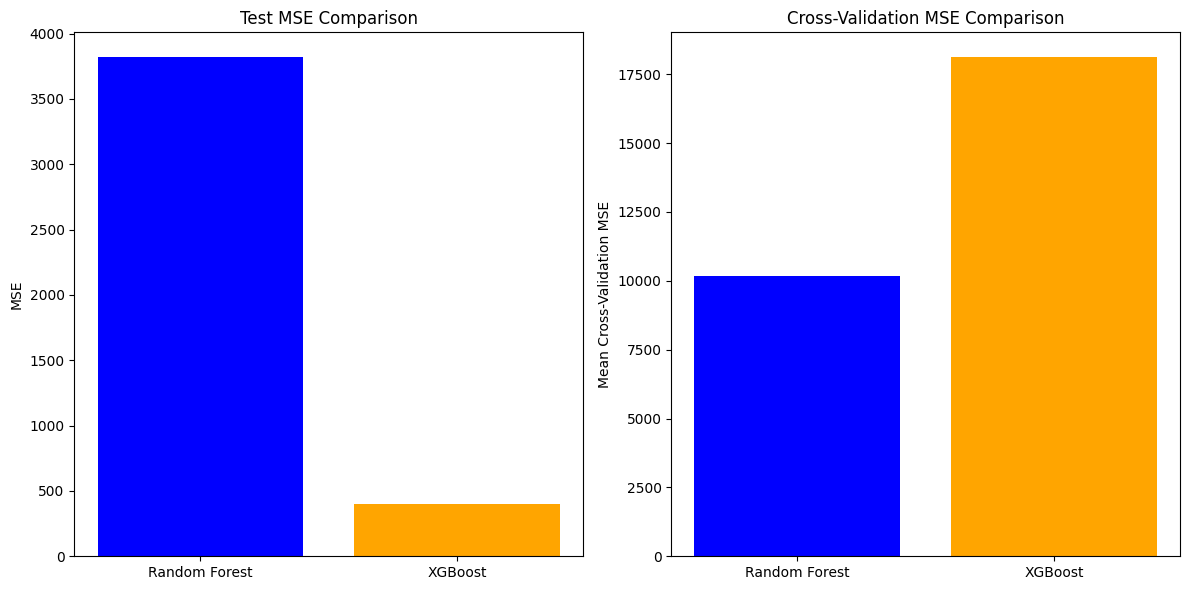

In [95]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'XGBoost']
test_mse_values = [rf_test_mse, xgb_test_mse]
cv_mse_values = [rf_cv_scores_mean, xgb_cv_scores_mean]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, test_mse_values, color=['blue', 'orange'])
plt.title('Test MSE Comparison')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(model_names, cv_mse_values, color=['blue', 'orange'])
plt.title('Cross-Validation MSE Comparison')
plt.ylabel('Mean Cross-Validation MSE')

plt.tight_layout()
plt.show()
